# Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Maritial Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

## Hypothesis Generation

##### Below are some of the factors which i think can affect the Loan Approval (dependent variable for this loan prediction problem):

1. Salary: Applicants with high income should have more chances of loan approval
2. Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval
3. Loan amount: Loan approvals should also depend on the loan amount. If the Loan amount is less, chances of loan approval should be high
4. Loan term: Loan for less time period and less amount should have higher chances of approval
5. EMI: lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval

In [1]:
# Loading Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Reading Data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
# Making copy of train and test data
train_original=train.copy()
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

we have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have almost same features in the test as the train except Loan_Status

In [6]:
# Given below is the description of each variable
# Loan_ID - Unique Loan ID
# Gender - Male/Female
# Married - Applicant married(Y/N)
# Dependents - Number of dependents
# Education - Applicant Education(Graduate/Under Graduate)
# Self_Employed - Self employed(Y/N)
# ApplicantIncome - Applicant income
# CoapplicantIncome - Coapplicant Income
# LoanAmount - Loan Amount in thousand
# Loan_Amount_Term - Term of loan in months
# Credit_History - Credit history meets guidelines
# Property_Area - Urban/Semi Urban/Rural
# Loan_Status - Loan Approved(Y/N)

In [7]:
# Print data types for each variable in train dataset
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# Observe the shape of datasets
train.shape, test.shape

((614, 13), (367, 12))

train dataset - 614 rows and 13 columns

test dataset - 367 rows and 12 columns

## Univariate Analysis

### Target Variable

In [9]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

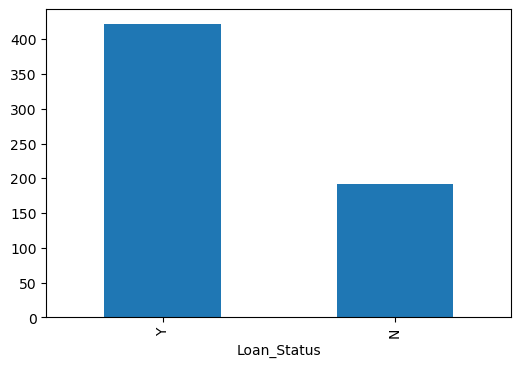

In [11]:
train['Loan_Status'].value_counts().plot.bar(figsize=(6,4))

In [12]:
# The loan of 422(around 69%) people out of 614 was approved

### Independent Variable (categorical)

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

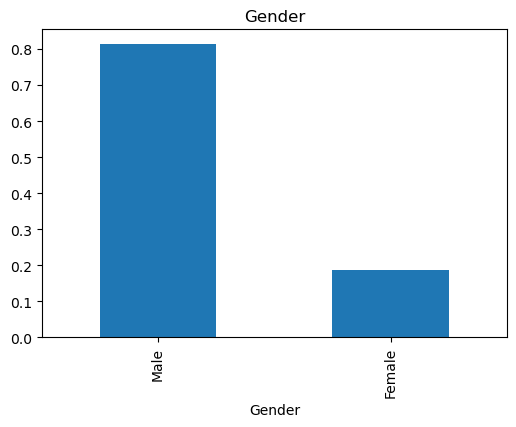

In [13]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(6,4),title='Gender')

<Axes: title={'center': 'Married'}, xlabel='Married'>

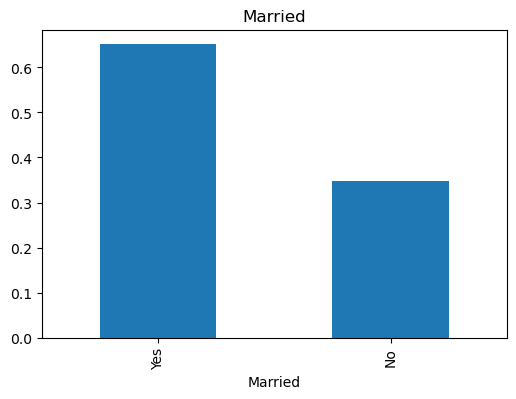

In [14]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(6,4),title='Married')

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

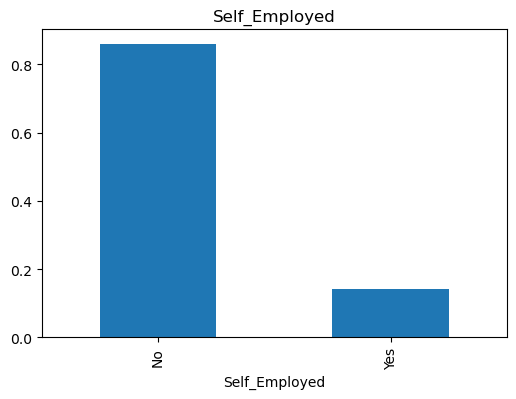

In [15]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(6,4),title='Self_Employed')

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

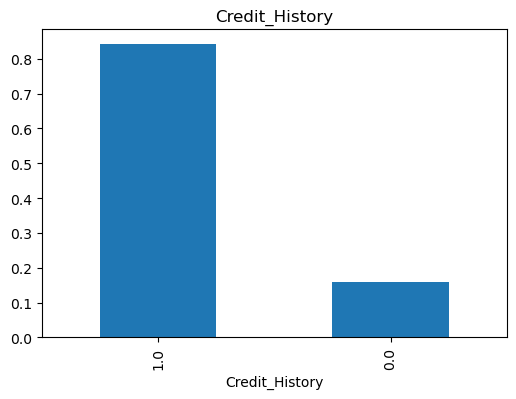

In [16]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(6,4),title='Credit_History')

In [17]:
# It can be inferred from the above bar plots that:
# 1. 80% applicants in the dataset are male
# 2. Around 65% of the applicants in the dataset are married
# 3. Around 15% applicants in the dataset are self employed
# 4. Around 85% applicants have repaid their debts

### Independent Variable (Ordinal)

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

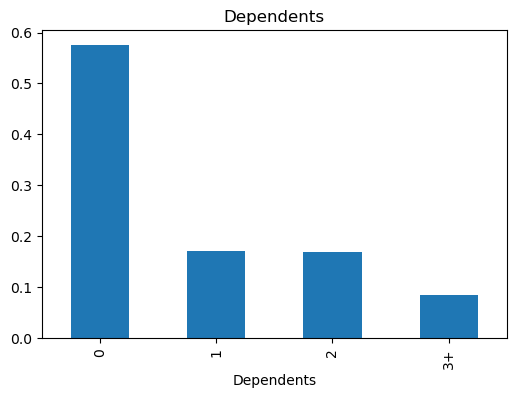

In [18]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(6,4),title='Dependents')

<Axes: title={'center': 'Education'}, xlabel='Education'>

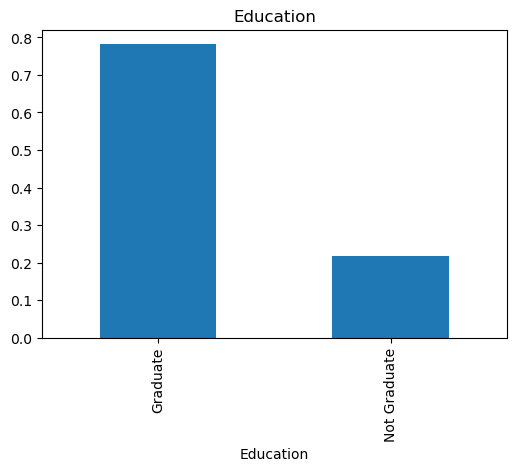

In [19]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(6,4),title='Education')

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

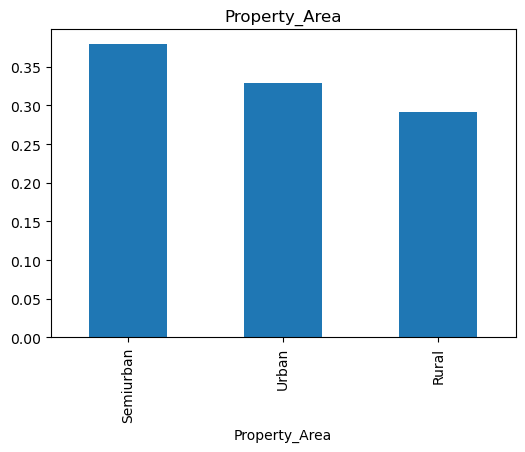

In [20]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(6,4),title='Property_Area')

In [21]:
# following inference can be made from the abaove bar plots:
# 1. Most of the applicants don't have any dependents.
# 2. Around 80% of the applicants are Graduates.
# 3.  ost of the applicants are from Semi Urban Area

### Independent Variable (Numerical)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


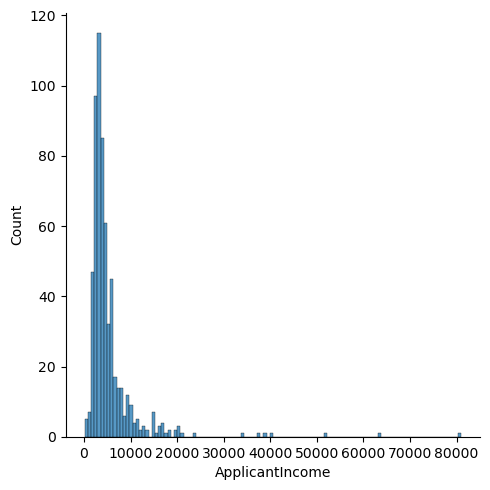

In [22]:
sns.displot(train['ApplicantIncome'])

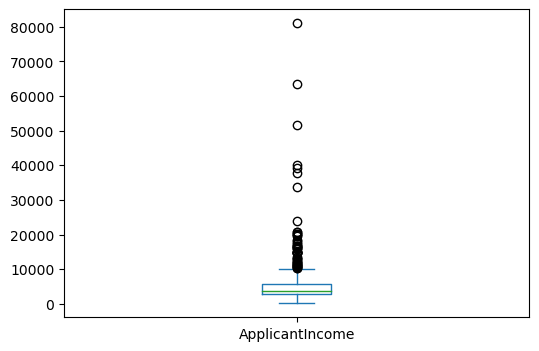

In [23]:
train['ApplicantIncome'].plot.box(figsize=(6,4))
plt.show()

In [24]:
# It can be inferred that most of the data in the distribution of applicant income is towards left. 
# which means it is normally distributed.

In [25]:
# Box plot confirms the presence of a lot of outliers/extreme values. 
# This can be attributed to the income dispaarity in the society.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

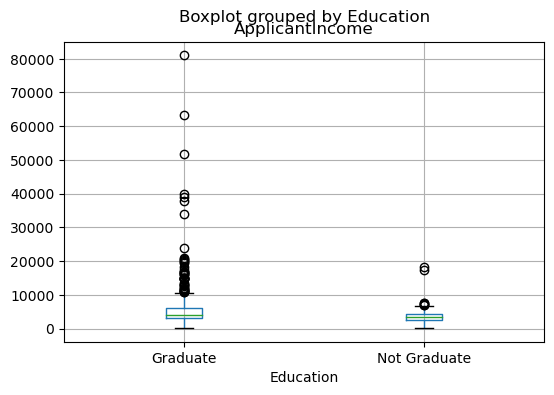

In [26]:
train.boxplot(figsize=(6,4),column='ApplicantIncome',by='Education')

In [27]:
# we can see that there are higher number of graduates with very high incomes, 
# which are appearing to be the outliers

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


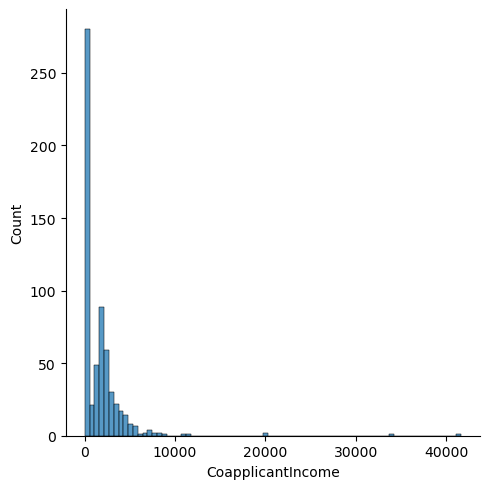

In [28]:
sns.displot(train['CoapplicantIncome'])

<Axes: >

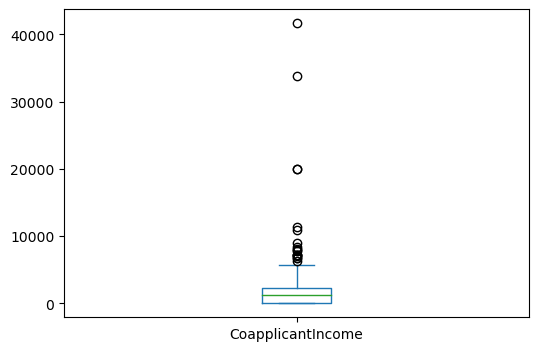

In [29]:
train['CoapplicantIncome'].plot.box(figsize=(6,4))

In [30]:
# Majority of Capplicant's income ranges from 0 to 5000.
# we also see a lot of outliers in the coapplicant income and it's not normally distributed

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10080\3189395263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

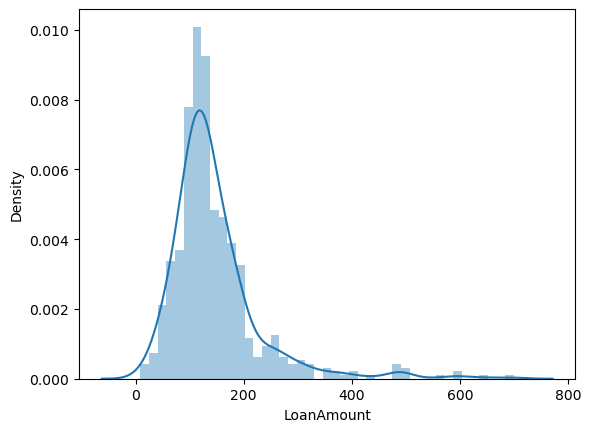

In [31]:
sns.distplot(train['LoanAmount'])

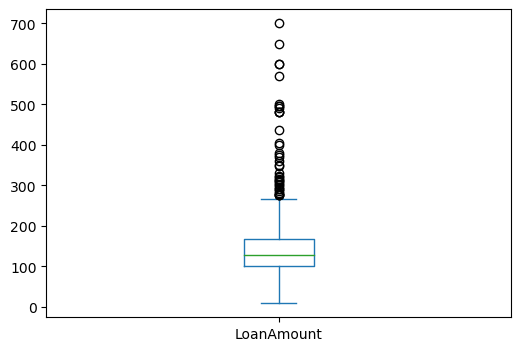

In [32]:
train['LoanAmount'].plot.box(figsize=(6,4))
plt.show()

In [33]:
# we see lots of outliers in this and distribution is fairly normal

## Bivariate Analysis

### Categorical Independent Variable vs Target Variable

<Axes: xlabel='Gender'>

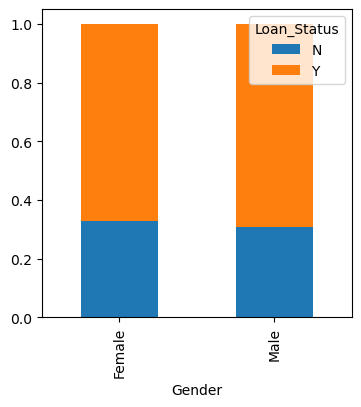

In [34]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [35]:
# It can be inferred that the proportion of male and female applicants is more or less same
# for both approved and unapproved.

<Axes: xlabel='Married'>

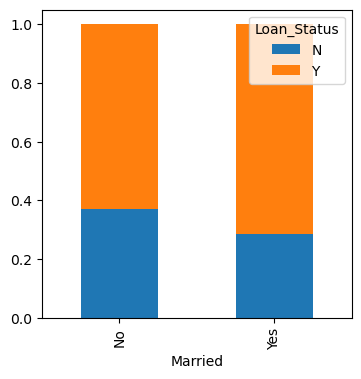

In [36]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Education'>

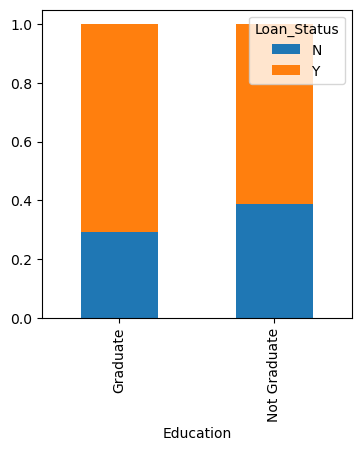

In [37]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Dependents'>

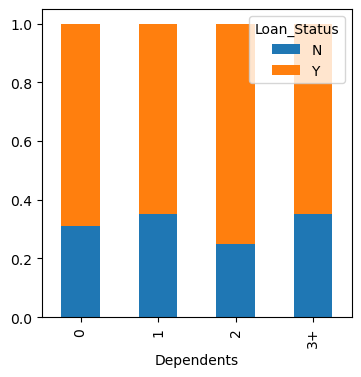

In [38]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Self_Employed'>

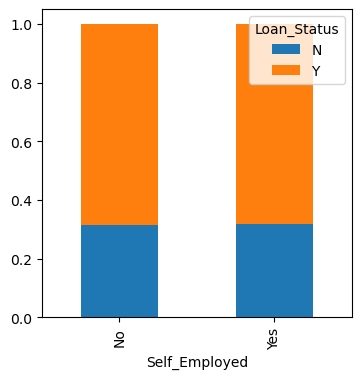

In [39]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [40]:
# proportion of married applicants is higher for the approved loans
# Distribution of applicants with 1 or 3+ dependents is similar across both categories of Loan_Status
# There is nothing significant we can infer from Self_Employed vs Loan_Status plot

<Axes: xlabel='Credit_History'>

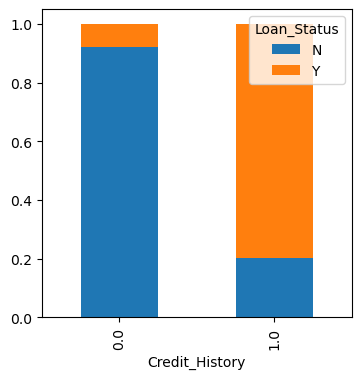

In [41]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Property_Area'>

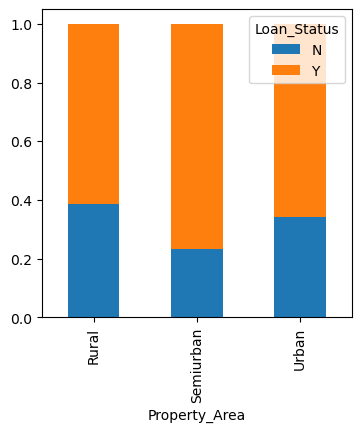

In [42]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [43]:
# It seems people with credit history 1 are more likely to get their loans approved
# Proportion of loans getting approved in semi urban area is higher as compared to that in 
# rural or urban areas

### Numerical Independent Variable vs Target Variable

<Axes: xlabel='Loan_Status'>

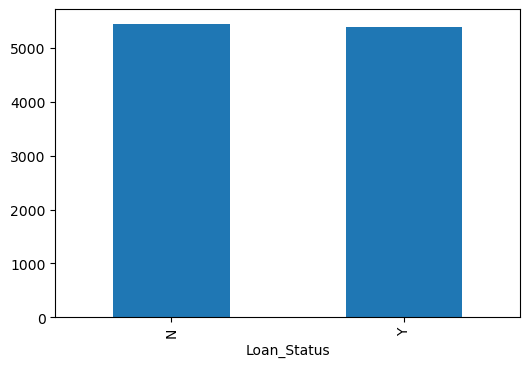

In [44]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(figsize=(6,4))

In [45]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [46]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

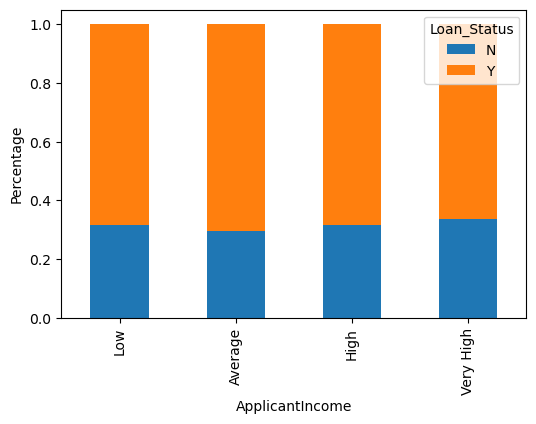

In [47]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel('ApplicantIncome') 
P= plt.ylabel('Percentage')

In [48]:
# It can be inferred that Applicant income does not affect the chances of loan approval
# which aontradicts our hypothesis in which we assumed that if the applicant income is high
# the chances of loan approval will also be high

In [49]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

In [50]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

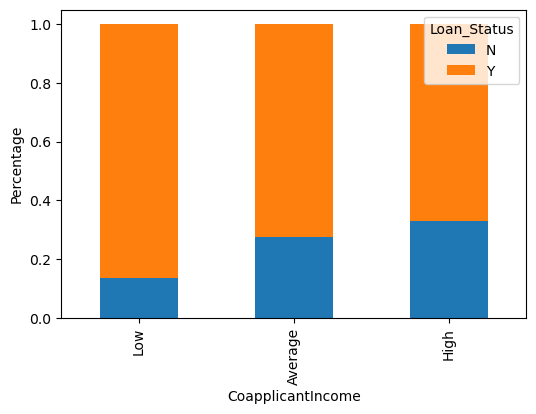

In [51]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel('CoapplicantIncome') 
P= plt.ylabel('Percentage')

In [52]:
# It shows that if coapplicant's income is less the chances of loan approval are high.

In [53]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

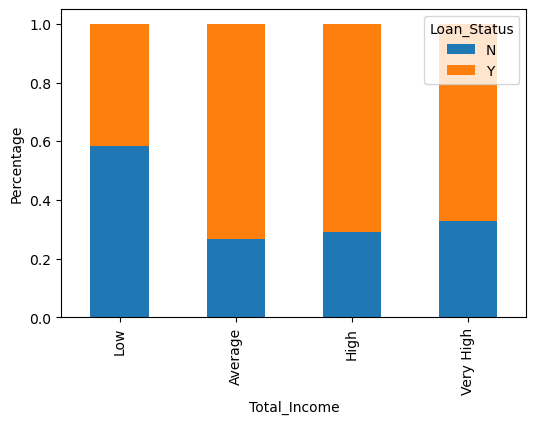

In [54]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel('Total_Income') 
P= plt.ylabel('Percentage')

In [55]:
# We can see that Proportion of loans getting approved for applicants having low Total_Income is 
# very less as compared to that of applicants with Average, High and Very High Income.

In [56]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

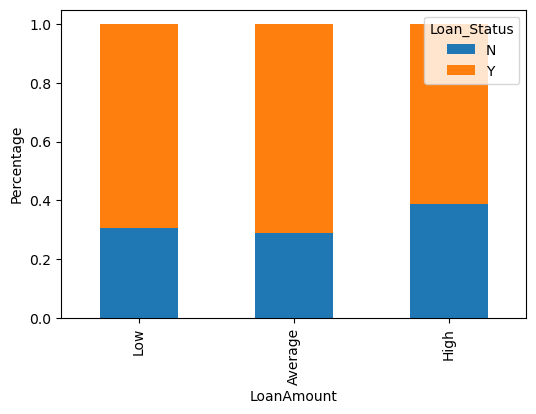

In [57]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.xlabel('LoanAmount') 
P= plt.ylabel('Percentage')

In [58]:
# It can be seen that the Proportion of approved loans is higher for Low and Average Loan Amount 
# as compared to that of High Loan Amount which supports our hypothesis in which we consisdered
# that the chances of loan approval will be high when the loan amount is less.

In [59]:
train=train.drop(['Income_bin','Total_Income_bin','LoanAmount_bin','Coapplicant_Income_bin','Total_Income'],axis=1)

In [60]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<Axes: >

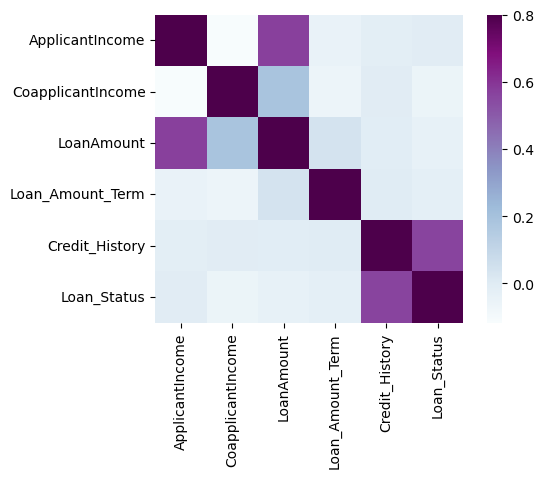

In [61]:
numeric_train = train.select_dtypes(include=['number'])
matrix = numeric_train.corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu", ax=ax)

In [62]:
# we see that the most correlated variables are (ApplicantIncome-LoanAmount) and
# (Credit_History-Loan_Status).
# LoanAmount is also correlated with CoapplicantIncome

## Missing Values and Outlier Treatment

### Missing Value imputation

In [63]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
# There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount,
# Loan_Amount_Term , Credit_History features

In [65]:
# For Numerical variables - imputation using mean or median
# For Categorical variables - imputation using mode

In [66]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [67]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [68]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [69]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [70]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [71]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [72]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [73]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment

In [74]:
# One way to remove the skewness is by doing the log transformation. 
# As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 
# So, we get a distribution similar to normal distribution.

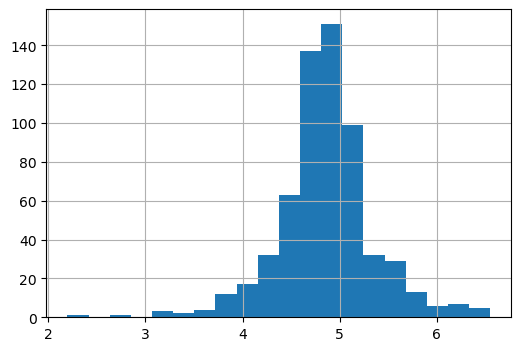

In [78]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20,figsize=(6, 4))
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [ ]:
# Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

## Logistic Regression

In [79]:
# Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) 
# given a set of independent variables.

# Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

# This function creates an s-shaped curve with the probability estimate, 
#which is very similar to the required stepwise function.

In [80]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [91]:
X = train.drop('Loan_Status',axis= 1)
y = train.Loan_Status

In [92]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
LogisticRegression(C=1.0, class_weight=None, dual=False,
fit_intercept=True, intercept_scaling=1, max_iter=100,
multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [97]:
pred_cv = model.predict(x_cv)

In [104]:
accuracy_score(y_cv,pred_cv)

0.7891891891891892

In [100]:
pred_test= model.predict(test)

In [101]:
submission = pd.read_csv("Sample_Submission.csv")

In [102]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [103]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')